In [ ]:
!pip install rasterio
!pip install pyproj
!pip install geopandas
!pip install laspy

     |████████████████████████████████| 18.3MB 229kB/s 
     |████████████████████████████████| 10.9MB 7.7MB/s 
     |████████████████████████████████| 972kB 8.1MB/s 
     |████████████████████████████████| 14.8MB 248kB/s 
     |████████████████████████████████| 491kB 8.2MB/s 


In [ ]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import geopandas as gps

In [ ]:
def details(filepath):
  src=rasterio.open(filepath)
  print(src.profile)
  array = src.read()
  l=array.shape
  print(l)
  for i in range(l[0]):
    array2 = src.read(i+1)
    pyplot.imshow(array2)#, cmap='pink')
  from rasterio.plot import show
  show(src)
  show(src.read(), transform=src.transform)
    

In [ ]:

filepath = '/content/drive/My Drive/Capstone/IDTREES_competition_train/RemoteSensing/RGB/MLBS_1.tif'
with rasterio.open(filepath) as src:
    print(src.profile)
    oviews = src.overviews(1)
    print(oviews)
for i, dtype, nodataval in zip(src.indexes, src.dtypes, src.nodatavals):
  print(i, dtype, nodataval)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 200, 'height': 200, 'count': 3, 'crs': CRS.from_epsg(32617), 'transform': Affine(0.1, 0.0, 542055.0,
       0.0, -0.1, 4134999.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}
[]
1 float32 -3.4e+38
2 float32 -3.4e+38
3 float32 -3.4e+38


In [ ]:
src = rasterio.open(filepath)
src.mode

'r'

In [ ]:
array = src.read(1)
array.shape

(20, 20)

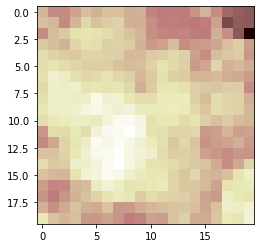

In [ ]:

pyplot.imshow(array, cmap='pink')

In [ ]:
array = src.read()
array.shape

(1, 20, 20)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 20, 'height': 20, 'count': 1, 'crs': CRS.from_epsg(32617), 'transform': Affine(1.0, 0.0, 543175.0,
       0.0, -1.0, 4142625.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
(1, 20, 20)


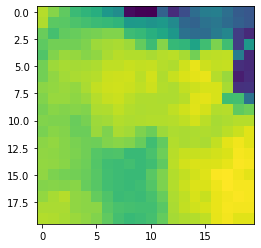

In [ ]:
details('/content/drive/My Drive/Capstone/IDTREES_competition_train/RemoteSensing/CHM/MLBS_10.tif')

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 20, 'height': 20, 'count': 369, 'crs': CRS.from_epsg(32617), 'transform': Affine(1.0, 0.0, 542055.0,
       0.0, -1.0, 4134999.0), 'tiled': False, 'interleave': 'pixel'}
(369, 20, 20)


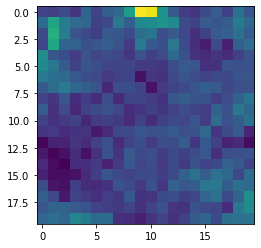

In [ ]:
details('/content/drive/My Drive/Capstone/IDTREES_competition_train/RemoteSensing/HSI/MLBS_1.tif')

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 20, 'height': 20, 'count': 369, 'crs': CRS.from_epsg(32617), 'transform': Affine(1.0, 0.0, 542055.0,
       0.0, -1.0, 4134999.0), 'tiled': False, 'interleave': 'pixel'}
(369, 20, 20)


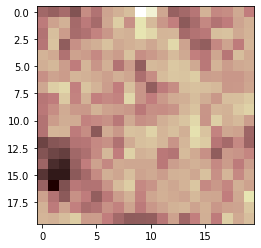

In [ ]:
src=rasterio.open('/content/drive/My Drive/Capstone/IDTREES_competition_train/RemoteSensing/HSI/MLBS_1.tif')
print(src.profile)
array = src.read()
l=array.shape
print(l)
array2 = src.read(5)
pyplot.imshow(array2, cmap='pink')

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 200, 'height': 200, 'count': 3, 'crs': CRS.from_epsg(32617), 'transform': Affine(0.1, 0.0, 404213.0,
       0.0, -0.1, 3285123.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}
(3, 200, 200)


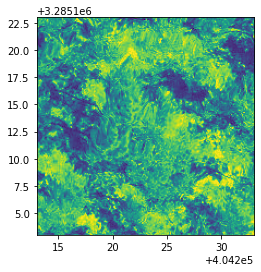

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


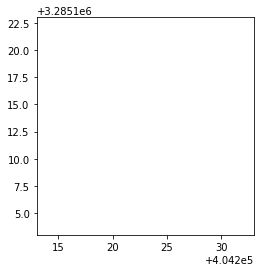

In [ ]:
details('/content/drive/My Drive/Capstone/IDTREES_competition_train/RemoteSensing/RGB/OSBS_7.tif')

In [ ]:
gdf=gps.read_file('/content/drive/My Drive/Capstone/IDTREES_competition_train/ITC/train_OSBS.shp')

(483, 3)
0      POLYGON ((407443.390 3286357.560, 407443.390 3...
1      POLYGON ((407446.540 3286354.410, 407446.540 3...
2      POLYGON ((407431.210 3286360.310, 407431.210 3...
3      POLYGON ((407433.650 3286358.360, 407433.650 3...
4      POLYGON ((407436.640 3286346.520, 407436.640 3...
                             ...                        
478    POLYGON ((406962.330 3283955.280, 406962.330 3...
479    POLYGON ((406960.860 3283956.800, 406960.860 3...
480    POLYGON ((406969.510 3283959.430, 406969.510 3...
481    POLYGON ((406967.630 3283960.880, 406967.630 3...
482    POLYGON ((406965.340 3283960.940, 406965.340 3...
Name: geometry, Length: 483, dtype: geometry
     id    indvdID                                           geometry
0  1000  OSBS01024  POLYGON ((407443.390 3286357.560, 407443.390 3...
1  1001  OSBS01025  POLYGON ((407446.540 3286354.410, 407446.540 3...
2  1002  OSBS01022  POLYGON ((407431.210 3286360.310, 407431.210 3...
3  1003  OSBS01021  POLYGON ((407433.65

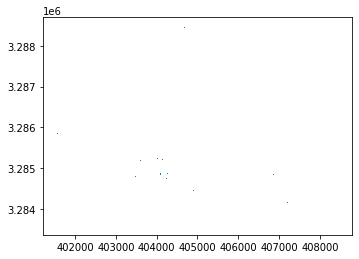

In [ ]:
print(gdf.shape)
print(gdf['geometry'])
print(gdf.head())
gdf.plot()
plt.show()

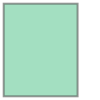

In [ ]:
gdf.loc[1, 'geometry']

In [ ]:
a=gdf.groupby(['indvdID']).count()
a[a['id']>1]

,id,geometry
indvdID,,
OSBS00007,2,2
OSBS00011,2,2
OSBS00023,2,2
OSBS00024,2,2
OSBS00050,2,2
OSBS00811,2,2
OSBS00849,2,2
OSBS02714,2,2
OSBS03020,2,2


In [ ]:
gdf['id'].nunique()

483

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        483 non-null    int64   
 1   indvdID   483 non-null    object  
 2   geometry  483 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 11.4+ KB


In [ ]:
gdf[gdf['indvdID']=='OSBS03847']

,id,indvdID,geometry
76,1077,OSBS03847,"POLYGON ((404241.700 3284723.300, 404241.700 3..."
352,1368,OSBS03847,"POLYGON ((404241.700 3284723.300, 404241.700 3..."


In [ ]:
gdf=gps.read_file('/content/drive/My Drive/Capstone/IDTREES_competition_train/ITC/train_MLBS.shp')

(732, 3)
0      POLYGON ((542063.468 4134979.321, 542063.468 4...
1      POLYGON ((542062.057 4134985.033, 542062.057 4...
2      POLYGON ((542059.898 4134979.987, 542059.898 4...
3      POLYGON ((542058.041 4134981.317, 542058.041 4...
4      POLYGON ((542054.970 4134998.793, 542058.995 4...
                             ...                        
727    POLYGON ((542014.816 4136609.346, 542014.816 4...
728    POLYGON ((542013.844 4136603.440, 542013.844 4...
729    POLYGON ((542013.619 4136604.038, 542019.450 4...
730    POLYGON ((542028.150 4136606.583, 542028.150 4...
731    POLYGON ((542026.450 4136601.432, 542026.450 4...
Name: geometry, Length: 732, dtype: geometry
   id    indvdID                                           geometry
0  41  MLBS01645  POLYGON ((542063.468 4134979.321, 542063.468 4...
1  42  MLBS01640  POLYGON ((542062.057 4134985.033, 542062.057 4...
2  43  MLBS01641  POLYGON ((542059.898 4134979.987, 542059.898 4...
3  44  MLBS01642  POLYGON ((542058.041 4134981.

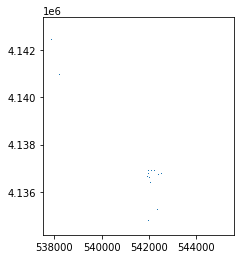

In [ ]:
print(gdf.shape)
print(gdf['geometry'])
print(gdf.head())
gdf.plot()
plt.show()

In [ ]:
(gdf.loc[1, 'geometry']).area()

TypeError: ignored

In [ ]:
a=gdf.groupby(['indvdID']).count()
a[a['id']>1]

,id,geometry
indvdID,,
MLBS00107,2,2
MLBS00117,2,2
MLBS00128,2,2
MLBS00133,2,2
MLBS00135,2,2
MLBS00144,2,2
MLBS00197,2,2
MLBS00395,2,2
MLBS00397,2,2


In [ ]:
import numpy as np
import laspy
inFile = laspy.file.File("/content/drive/My Drive/Capstone/IDTREES_competition_train/RemoteSensing/LAS/MLBS_1.las", mode = "r")
inFile.z

array([1318.435, 1322.004, 1321.888, ..., 1315.336, 1311.909, 1431.751])

In [ ]:
# Grab all of the points from the file.
point_records = inFile.points

# Grab just the X dimension from the file, and scale it.

def scaled_x_dimension(las_file):
    x_dimension = las_file.X
    scale = las_file.header.scale[0]
    offset = las_file.header.offset[0]
    return(x_dimension*scale + offset)

scaled_x = scaled_x_dimension(inFile)
scaled_x

array([542055.166, 542055.336, 542055.722, ..., 542074.185, 542072.997,
       542056.679])

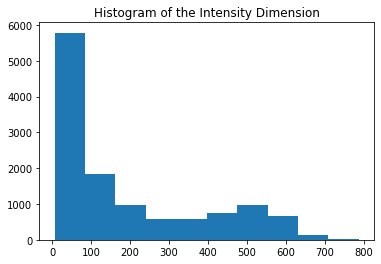

In [ ]:
import matplotlib.pyplot as plt
plt.hist(inFile.intensity)
plt.title("Histogram of the Intensity Dimension")
plt.show()

In [ ]:
dataset = np.vstack([inFile.x, inFile.y, inFile.z]).transpose()
dataset.shape

(12318, 3)

In [ ]:
%%time
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step
#ground points grid filter
n = 100 #grid step
dataset_Z_filtered = dataset[[0]]
zfiltered = (dataset[:, 2].max() - dataset[:, 2].min())/10 #setting height filtered from ground
print('zfiltered =', zfiltered)
xstep = (dataset[:, 0].max() - dataset[:, 0].min())/n
ystep = (dataset[:, 1].max() - dataset[:, 1].min())/n
for x in frange (dataset[:, 0].min(), dataset[:, 0].max(), xstep):
  for y in frange (dataset[:, 1].min(), dataset[:, 1].max(), ystep):
    datasetfiltered = dataset[(dataset[:,0] > x)
                             &(dataset[:, 0] < x+xstep)
                             &(dataset[:, 1] > y)
                             &(dataset[:, 1] < y+ystep)]
    if datasetfiltered.shape[0] > 0:
      datasetfiltered = datasetfiltered[datasetfiltered[:, 2]
                        >(datasetfiltered[:, 2].min()+ zfiltered)]
      if datasetfiltered.shape[0] > 0:
        dataset_Z_filtered = np.concatenate((dataset_Z_filtered,
                                             datasetfiltered))
print('dataset_Z_filtered shape', dataset_Z_filtered.shape)

zfiltered = 12.444399999999996
dataset_Z_filtered shape (176, 3)
CPU times: user 592 ms, sys: 0 ns, total: 592 ms
Wall time: 596 ms


In [ ]:
import laspy
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import path
dataset = preprocessing.normalize(dataset)


In [ ]:
clustering = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(dataset)

In [ ]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


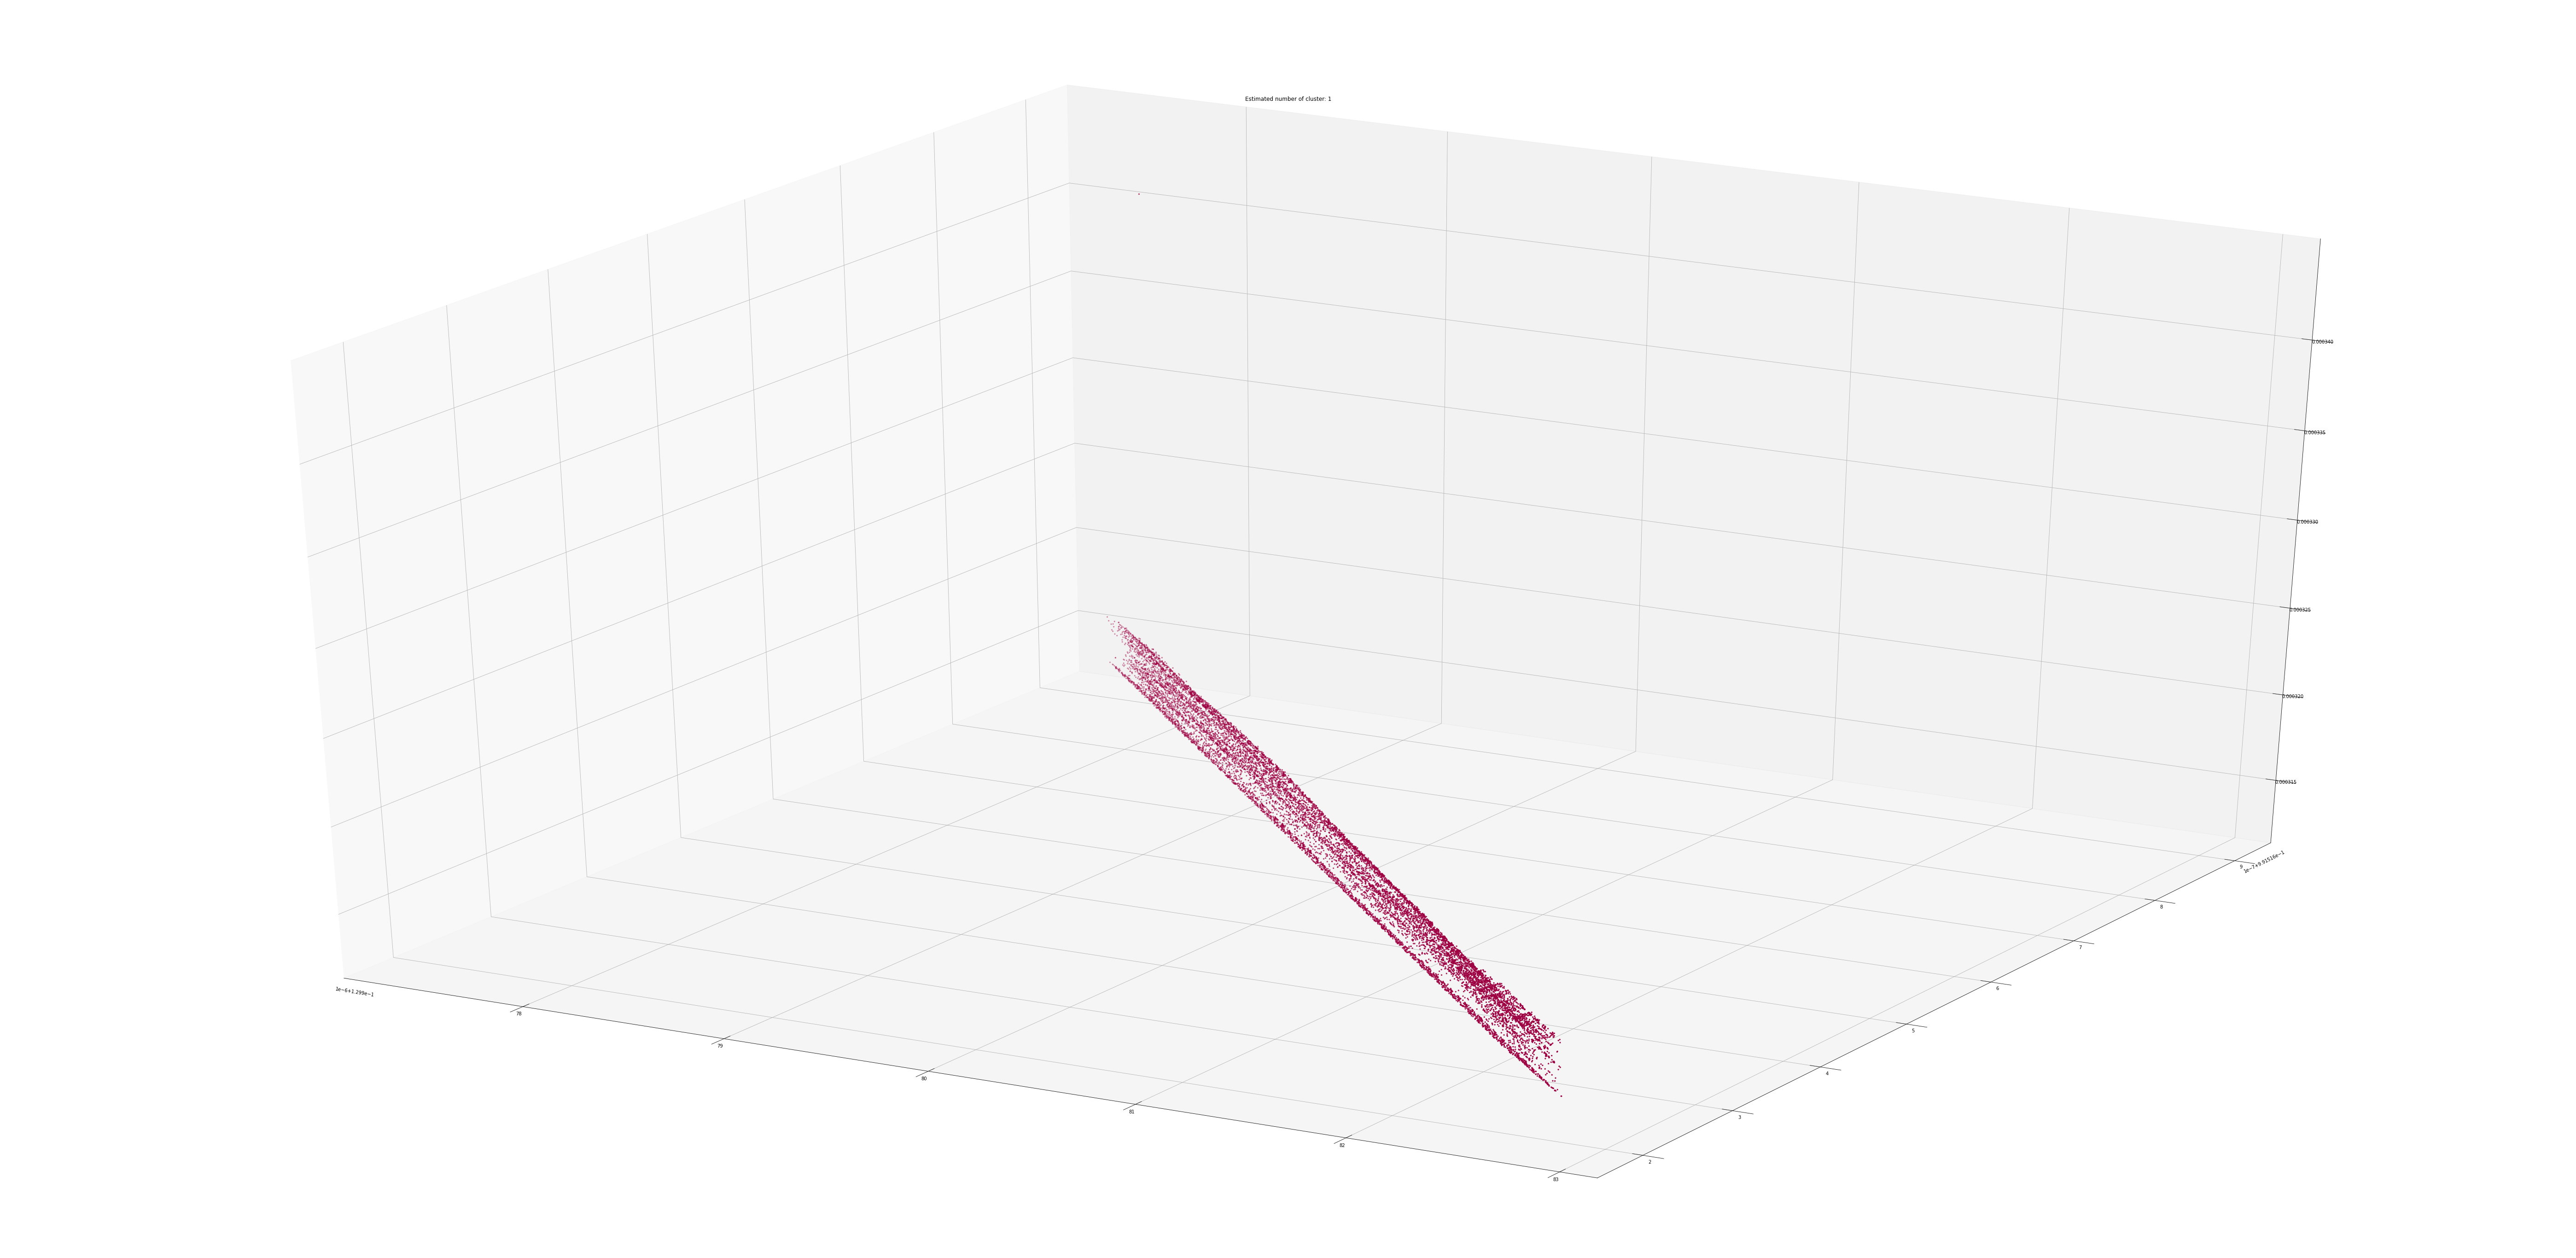

In [ ]:
fig = plt.figure(figsize=[100, 50])
ax = fig.add_subplot(111, projection='3d')
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
  for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:
    # Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = (labels == k)
  xyz = dataset[class_member_mask & core_samples_mask]
  ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=col, marker='.')
plt.title('Estimated number of cluster: %d' % n_clusters_)
plt.show()